

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment    .
‘Neighborhood’ indicates the location of the hospital    .
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família       .

#### Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [119]:
# Use this cell to set up import statements for all of the packages that you  plan to use.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [120]:
# Load your data and print out a few lines..
df=pd.read_csv('noshowappointments-kagglev2-may-2016 (1).csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [121]:
# fiend the number of pationt
df.shape

(110527, 14)

In [122]:
# fiend the type of the data
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [123]:
# Perform operations to inspect data types and look for instances of missing or possibly errant data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [143]:
df.isnull().sum()

Gender           0
Neighbourhood    0
Scholarship      0
Hypertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
No_show          0
dtype: int64

 NO Missing Data 

In [124]:
# descripe the data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The Mean Of Ages Is 37 Years    .
The Maximum Ages Is 155 Years       .
There a Probably a Mistake with a Patient Age , It Show -1 Year ,Which Dosen't Make Sense           .


# Data Cleaning

 

In [144]:
# print number of duplicates in  datasets
print(df.duplicated().sum())

105910


In [146]:
# drop duplicates in both datasets
df.drop_duplicates(inplace=True)

In [148]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df.duplicated().sum())

0


we removed the duplicated value in dateset

In [125]:
# filter datasets for rows following Age >=0
df = df.query('Age>= 0 ')
# confirm only age is >=0
df['Age'].unique()
df.drop('Age', axis=1, inplace=True)
df.describe()

,PatientId,AppointmentID,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we drop some value of Age which meaningles (less than 0)

In [126]:
# i won't need some of data like [PatientId	,AppointmentID,ScheduledDay,AppointmentDay]
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head(2)

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,JARDIM DA PENHA,0,0,0,0,0,0,No


In [127]:
# i well rename the the column No-show to No_show
#and i well corect the spelling in  Hipertension to Hypertension
df.rename(columns={'No-show':'No_show'} ,inplace=True)
df.rename(columns={'Hipertension':'Hypertension'} ,inplace=True)
df.head(2)

,Gender,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,JARDIM DA PENHA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
> 

### Research Question 1 (Replace this header name!)

array([[<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>],
       [<AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

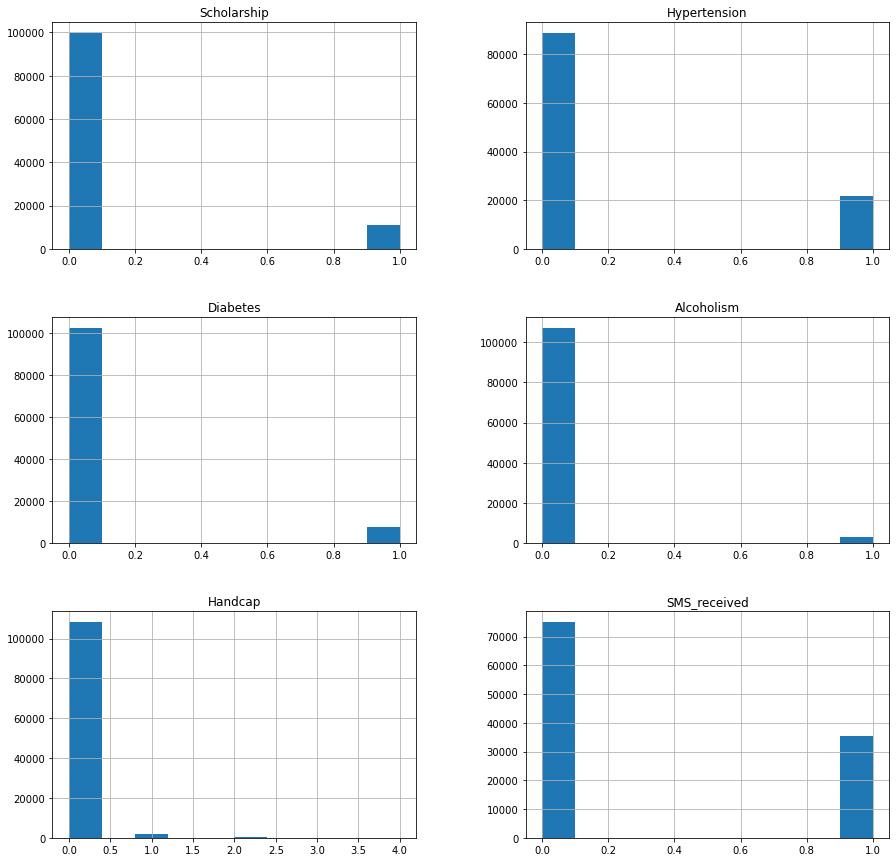

In [128]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,15))


Most of the Patients didn't Suffer from Chronic Diseases nor are handicapped 
About 9% of Patients are Enrolled in Scholarship
About 18% of Patients are Suffer from Hypertension 
Number of Patients who received sms are half those who didn't


In [129]:
# assigning names to show and no show to make it easy recall and comparison
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count()


Gender           88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
No_show          88207
dtype: int64

In [130]:
df[noshow].count()

Gender           22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

The patients who went  to Appointment was about 4 times those who didn't go

In [131]:
'''
            The function to draw relationship between two variables x,y 
            Parameters:
                    string (col1): the column from dataset on x axis.
                    string (col2): the column from dataset on y axis.
                    string (title): the title for reationship .
'''



def plot_hist(col1, col2,title):
    
    col1.hist(alpha=0.5,label='show') 
    col2.hist(alpha=0.5,label='noshow')
    plt.title(title);
    plt.xlabel("Show status")
    plt.ylabel('Patient number')
  


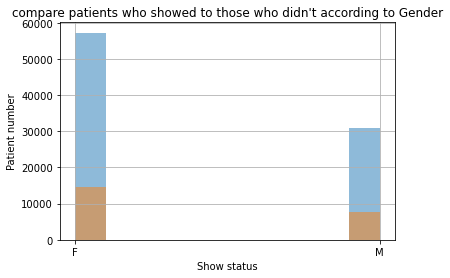

In [132]:
#compare patients who showed to those who didn't according to gender
plot_hist(df.Gender[show], df.Gender[noshow],"compare patients who showed to those who didn't according to Gender")




In [133]:
#compare patients who showed to those who didn't according to gender
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    57245
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


In [134]:
#compare patients who showed to those who didn't according to gender
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

Gender is inssignificant

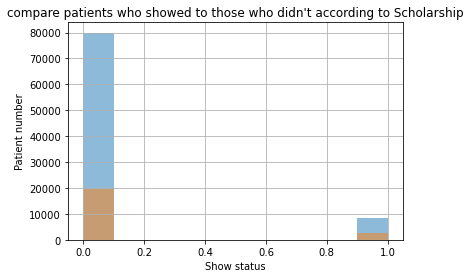

In [135]:
#compare patients who showed to those who didn't according to Scholarship

plot_hist(df.Scholarship[show], df.Scholarship[noshow],"compare patients who showed to those who didn't according to Scholarship")

Scholarship is inssignificant

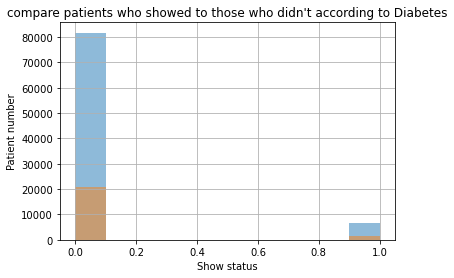

In [136]:
#compare patients who showed to those who didn't according to Diabetes

plot_hist(df.Diabetes[show], df.Diabetes[noshow],"compare patients who showed to those who didn't according to Diabetes")

Diabetes is inssignificant

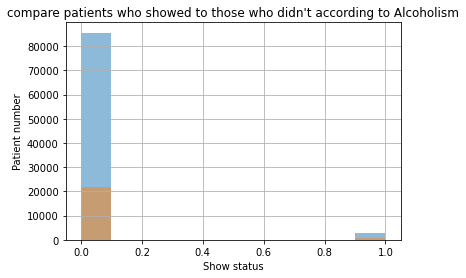

In [137]:
#compare patients who showed to those who didn't according to Alcoholism
plot_hist(df.Alcoholism[show], df.Alcoholism[noshow],"compare patients who showed to those who didn't according to Alcoholism")

Alcoholism is inssignificant

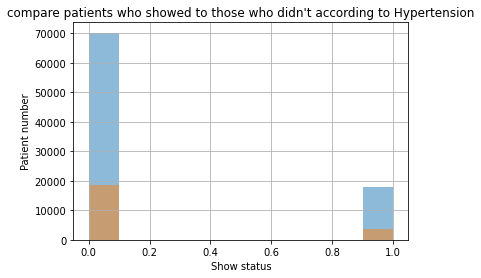

In [138]:
#compare patients who showed to those who didn't according to Hypertension
plot_hist(df.Hypertension[show], df.Hypertension[noshow],"compare patients who showed to those who didn't according to Hypertension")

Hypertension is inssignificant

### Research Question 2  (Replace this header name!)

Patients in the Age group 0_10 showed more than all the Age groups ,Followed by the age group 35-75
The Older they get ,the less they tend to get an Appointment

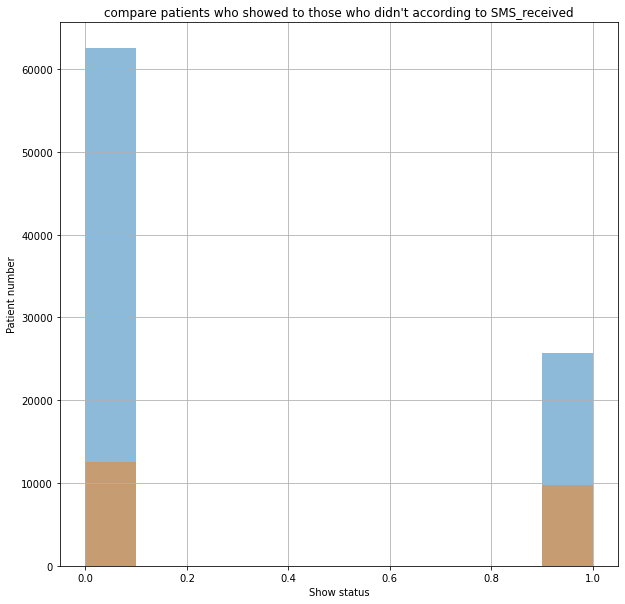

In [139]:
#compare patients who showed to those who didn't according to SMS_received
plt.figure(figsize=(10,10))
plot_hist(df.SMS_received[show], df.SMS_received[noshow],"compare patients who showed to those who didn't according to SMS_received")

it's a big strange to see that patients who didn't received sms  is more than  those who received

Text(0, 0.5, 'Patient number')

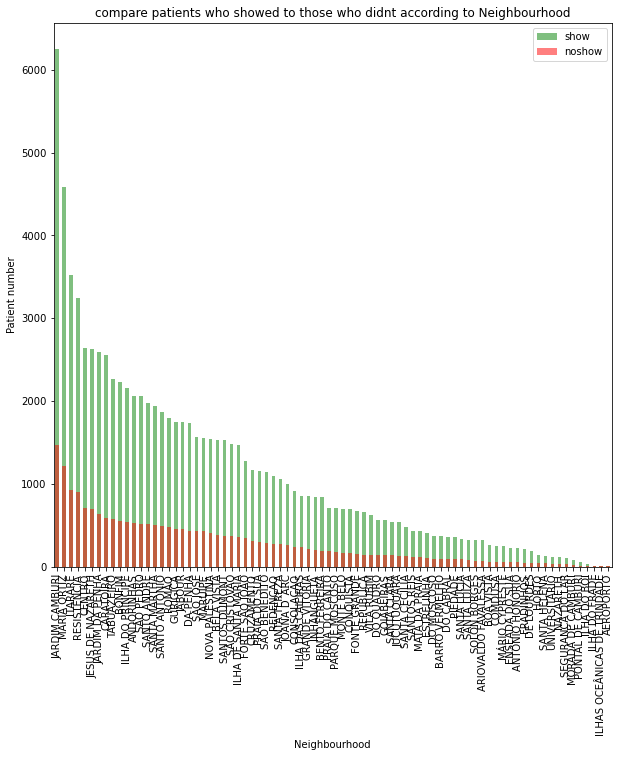

In [140]:
#compare patients who showed to those who didn't according to Neighbourhood
plt.figure(figsize=(10,10))
df.Neighbourhood[show].value_counts().plot(kind='bar',alpha=0.5,color='green',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',alpha=0.5,color='red',label='noshow')
plt .legend()
plt.title('compare patients who showed to those who didnt according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient number')

it seems that Neighbourhood is strongly affected with attendance of the pathient 

<a id='conclusions'></a>
# Conclusions
In dataset we find some duplicated value and we removed it from the data

And we find some meaningles value in age column which =-1 and we dreoped it 


At the end I can say that  neighbourhood is strongly related to the patients showing up the clinic.

It sounds strange, more people showed without receiving  an SMS.


## Limitations
. Couldn't Detect Direct Correlation between patients Attendance and many characteristics such as gender, chronic, disease  and disables





In [149]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1